<a href="https://colab.research.google.com/github/Logeshwaran32/Industrial-Copper/blob/main/Copper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Read the CSV file into a pandas dataframe
df = pd.read_csv('/content/Copper_Set.xlsx - Result 1.csv')
df.head(5)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1.670799e+09,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1.668702e+09,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,6.283770e+05,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1.668702e+09,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,6.406650e+05,20210301.0,577.00


Null values, shape and data types before dealing with incorrect data

In [ ]:
df.shape

(75632, 14)

In [ ]:
# missing values
missing_values_count = df.isnull().sum()
print(missing_values_count)

id                   1
item_date            0
quantity tons        0
customer             1
country              1
status               1
item type            1
application          1
thickness            1
width                1
material_ref     32581
product_ref          1
delivery date        1
selling_price        1
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75632 entries, 0 to 75631
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             75631 non-null  object 
 1   item_date      75632 non-null  int64  
 2   quantity tons  75632 non-null  float64
 3   customer       75631 non-null  float64
 4   country        75631 non-null  float64
 5   status         75631 non-null  object 
 6   item type      75631 non-null  object 
 7   application    75631 non-null  float64
 8   thickness      75631 non-null  float64
 9   width          75631 non-null  float64
 10  material_ref   43051 non-null  object 
 11  product_ref    75631 non-null  float64
 12  delivery date  75631 non-null  float64
 13  selling_price  75631 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 8.1+ MB


Dealing with data in wrong format

In [ ]:
# dealing with data in wrong format
# for categorical variables, this step is ignored
# df = df[df['status'].isin(['Won', 'Lost'])]
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

Nan values and shape after dealing with data in wrong format

In [ ]:
missing_values_count = df.isnull().sum()
print(missing_values_count)
print(df.shape)
df.info()

id                   1
item_date            1
quantity tons        0
customer             1
country              1
status               1
item type            1
application          1
thickness            1
width                1
material_ref     32581
product_ref          1
delivery date        2
selling_price        1
dtype: int64
(75632, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75632 entries, 0 to 75631
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             75631 non-null  object 
 1   item_date      75631 non-null  object 
 2   quantity tons  75632 non-null  float64
 3   customer       75631 non-null  float64
 4   country        75631 non-null  float64
 5   status         75631 non-null  object 
 6   item type      75631 non-null  object 
 7   application    75631 non-null  float64
 8   thickness      75631 non-null  float64
 9   width          75631 non-null  float64
 10  material_re

Dealing with Missing Values

In [ ]:
# material_ref has large set of null values, so replacing them with unknown
df['material_ref'].fillna('unknown', inplace=True)
# deleting the remaining null values as they are less than 1% of data which can be neglected
df = df.dropna()

In [ ]:
missing_values_count = df.isnull().sum()
print(missing_values_count)
print(df.shape)

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64
(75628, 14)


In [ ]:
df_p=df.copy()

PLOTTING

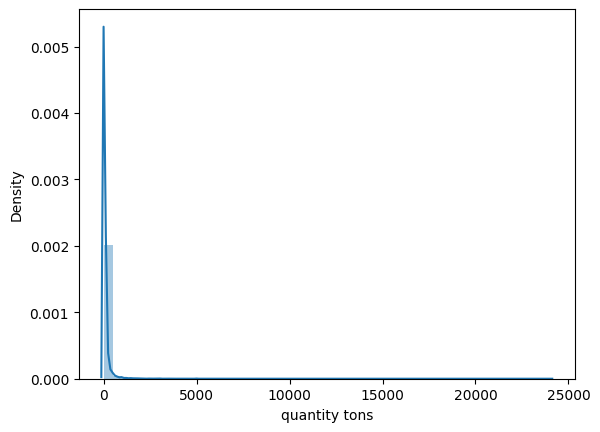

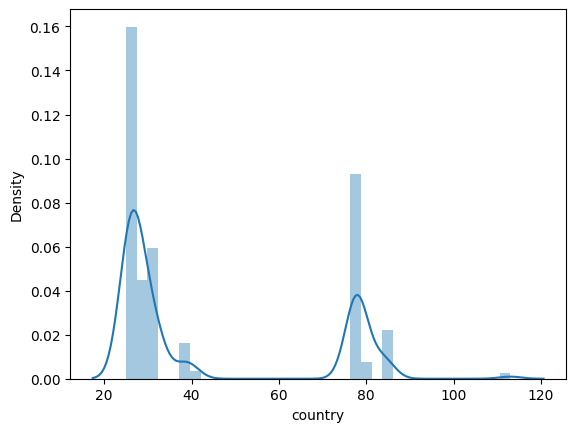

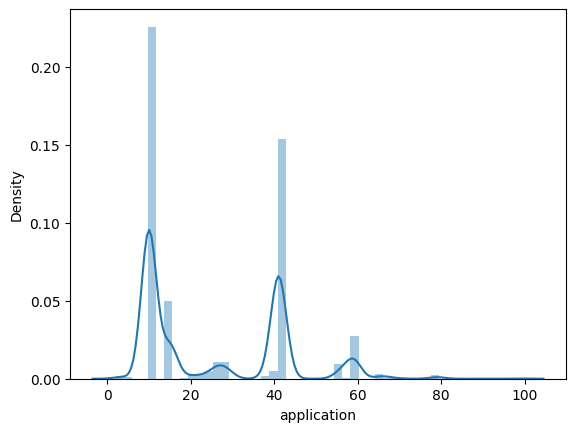

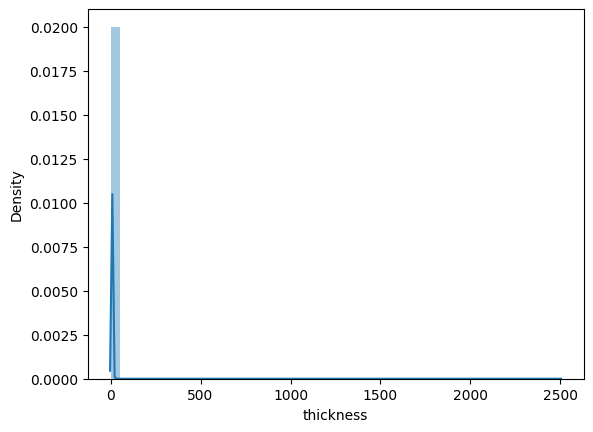

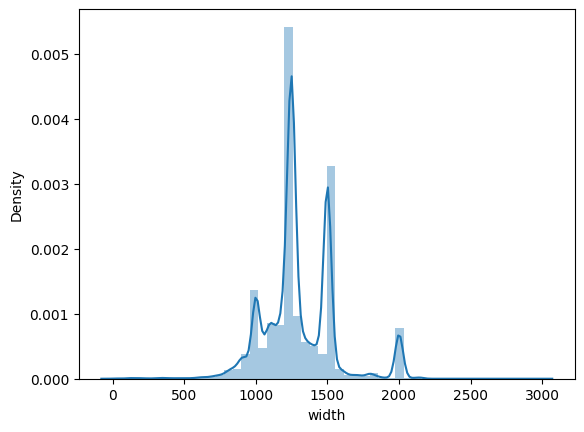

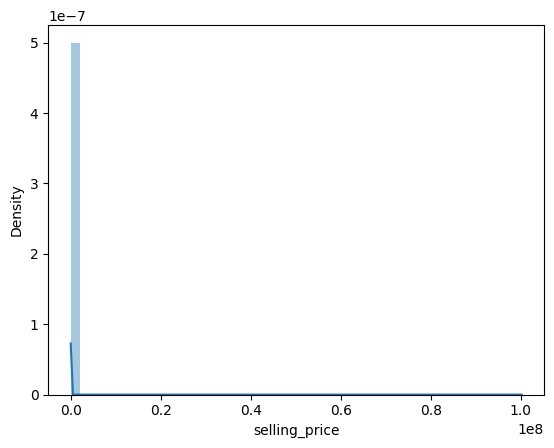

In [ ]:
# ['quantity tons','selling_price','application','thickness','width', 'country']
# ['status','item type']

df_p['quantity tons']   # skewed
df_p['country']
df_p['application']
df_p['thickness']       # skewed
df_p['width']
df_p['selling_price']   # skewed

import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(df_p['quantity tons'])
plt.show()
sns.distplot(df_p['country'])
plt.show()
sns.distplot(df_p['application'])
plt.show()
sns.distplot(df_p['thickness'])
plt.show()
sns.distplot(df_p['width'])
plt.show()
sns.distplot(df_p['selling_price'])
plt.show()

In [ ]:
import numpy as np
mask1 = df_p['selling_price'] <= 0
print(mask1.sum())
df_p.loc[mask1, 'selling_price'] = np.nan

mask1 = df_p['quantity tons'] <= 0
print(mask1.sum())
df_p.loc[mask1, 'quantity tons'] = np.nan

mask1 = df_p['thickness'] <= 0
print(mask1.sum())

6
0
0


In [ ]:
df_p.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    6
dtype: int64

In [ ]:
df_p.dropna(inplace=True)
len(df_p)

75622

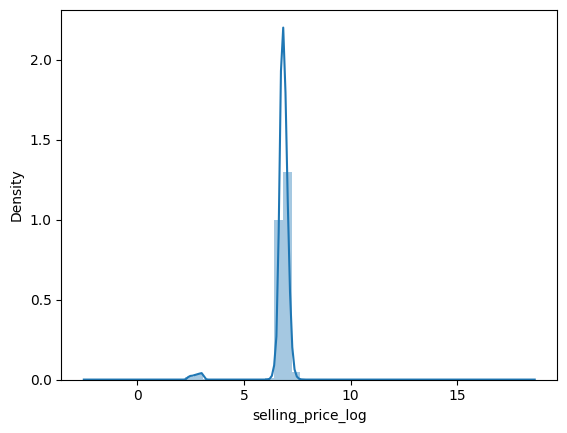

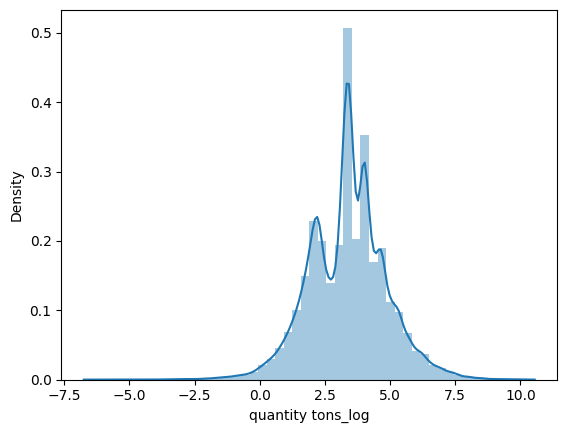

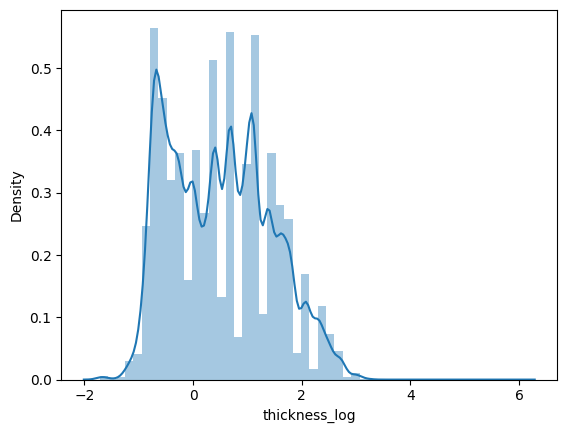

In [ ]:
import numpy as np
df_p['selling_price_log'] = np.log(df_p['selling_price'])
sns.distplot(df_p['selling_price_log'])
plt.show()

df_p['quantity tons_log'] = np.log(df_p['quantity tons'])
sns.distplot(df_p['quantity tons_log'])
plt.show()

df_p['thickness_log'] = np.log(df_p['thickness'])
sns.distplot(df_p['thickness_log'])
plt.show()
# reverts log
# df_p['reverted_values'] = np.exp(df_p['selling_price_log'])
# sns.distplot(df_p['reverted_values'])
# plt.show()

In [ ]:
df_p.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1.670799e+09,2021-07-01,854.00,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1.668702e+09,2021-04-01,1047.00,6.953684,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,6.283770e+05,2021-01-01,644.33,6.468211,5.956169,-0.967584
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1.668702e+09,2021-01-01,768.00,6.643790,5.310301,0.832909
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,6.406650e+05,2021-03-01,577.00,6.357842,6.666354,1.386294


<Axes: >

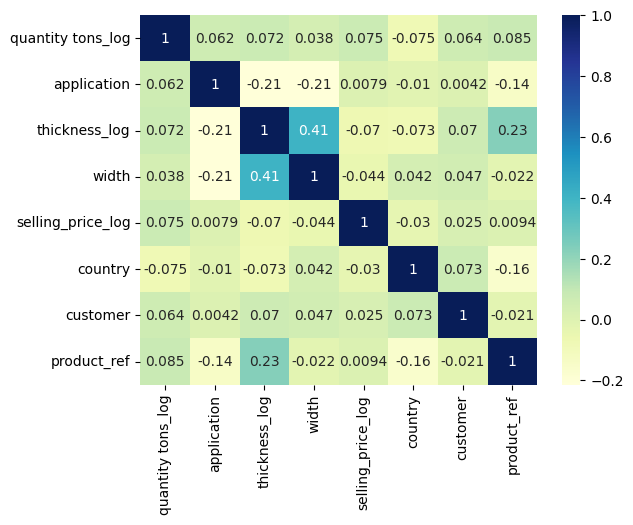

In [ ]:
x=df_p[['quantity tons_log','application','thickness_log','width','selling_price_log','country','customer','product_ref']].corr()
sns.heatmap(x, annot=True, cmap="YlGnBu")

DECISION TREE REGRESSOR
Encode categorical features

Test and Train split

Define Hyperparameters for GridSearchCV

Train the DecisionTreeRegressor with best parameters

Evalution metrics

Predict the selling price for new values

Save the DecisionTreeRegressor model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

X=df_p[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=df_p['selling_price_log']
# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X[['status']])
X_be = ohe2.fit_transform(X[['status']]).toarray()
# independent features after encoding
X = np.concatenate((X[['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# decision tree
dtr = DecisionTreeRegressor()
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Best hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean squared error: 0.011690141120139374
R-squared: 0.974125609250007


In [ ]:
# ['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be
new_sample = np.array([[np.log(40), 10, np.log(250), 0, 28,30202938,1670798778,'PL','Won']])
new_sample_ohe = ohe.transform(new_sample[:, [7]]).toarray()
new_sample_be = ohe2.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Predicted selling price:', np.exp(new_pred))

Predicted selling price: [657.9834646]


In [ ]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('t.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('s.pkl', 'wb') as f:
    pickle.dump(ohe2, f)

In [ ]:
print(len(df_p))
df_p.head(3)

75622


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1.670799e+09,2021-07-01,854.00,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1.668702e+09,2021-04-01,1047.00,6.953684,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,6.283770e+05,2021-01-01,644.33,6.468211,5.956169,-0.967584


In [ ]:
df_c = df_p[df_p['status'].isin(['Won', 'Lost'])]
len(df_c)

62544

DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer

Y = df_c['status']
X= df_c[['quantity tons_log','selling_price_log','item type','application','thickness_log','width','country','customer','product_ref']]

# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
be = LabelBinarizer()
be.fit(Y)
y = be.fit_transform(Y)
# independent features after encoding
X = np.concatenate((X[['quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.9190982492605324
Confusion Matrix:
[[1851  534]
 [ 478 9646]]


Confusion Matrix:
[[1851  534]
 [ 478 9646]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      2385
           1       0.95      0.95      0.95     10124

    accuracy                           0.92     12509
   macro avg       0.87      0.86      0.87     12509
weighted avg       0.92      0.92      0.92     12509



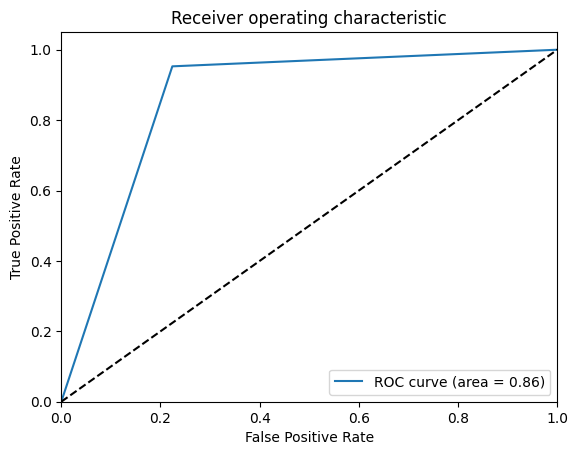

In [ ]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Predict the status for a new sample
# 'quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe
new_sample = np.array([[np.log(700), np.log(956), 10, np.log(2),1500,28.0,30202938,1670798778,'W']])
new_sample_ohe = ohe.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = dtc.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Lost


In [ ]:
# Saving the model
import pickle
with open('clsmodel.pkl', 'wb') as file:
    pickle.dump(dtc, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(ohe, f)

In [ ]:
from google.colab import files

# List of file paths to download
file_paths = ['/content/model.pkl', '/content/scaler.pkl', '/content/t.pkl','/content/s.pkl','/content/clsmodel.pkl','/content/cscaler.pkl','/content/ct.pkl']

# Loop through each file path and download it
for file_path in file_paths:
    files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Streamlit App

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelBinarizer
import streamlit as st
import re

st.set_page_config(layout="wide")

st.write("""
<div style='text-align:center'>
    <h1 style='color:#009999;'>Industrial Copper Modeling Application</h1>
</div>
""", unsafe_allow_html=True)

tab1, tab2 = st.tabs(["PREDICT SELLING PRICE", "PREDICT STATUS"])
with tab1:
    # Define the possible values for the dropdown menus
    status_options = ['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM', 'Wonderful', 'Revised', 'Offered',
                      'Offerable']
    item_type_options = ['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR']
    country_options = [28., 25., 30., 32., 38., 78., 27., 77., 113., 79., 26., 39., 40., 84., 80., 107., 89.]
    application_options = [10., 41., 28., 59., 15., 4., 38., 56., 42., 26., 27., 19., 20., 66., 29., 22., 40., 25., 67.,
                           79., 3., 99., 2., 5., 39., 69., 70., 65., 58., 68.]
    product = ['611112', '611728', '628112', '628117', '628377', '640400', '640405', '640665',
               '611993', '929423819', '1282007633', '1332077137', '164141591', '164336407',
               '164337175', '1665572032', '1665572374', '1665584320', '1665584642', '1665584662',
               '1668701376', '1668701698', '1668701718', '1668701725', '1670798778', '1671863738',
               '1671876026', '1690738206', '1690738219', '1693867550', '1693867563', '1721130331', '1722207579']

    # Define the widgets for user input
    with st.form("my_form"):
        col1, col2, col3 = st.columns([5, 2, 5])
        with col1:
            st.write(' ')
            status = st.selectbox("Status", status_options, key=1)
            item_type = st.selectbox("Item Type", item_type_options, key=2)
            country = st.selectbox("Country", sorted(country_options), key=3)
            application = st.selectbox("Application", sorted(application_options), key=4)
            product_ref = st.selectbox("Product Reference", product, key=5)
        with col3:
            st.write(
                f'<h5 style="color:rgb(0, 153, 153,0.4);">NOTE: Min & Max given for reference, you can enter any value</h5>',
                unsafe_allow_html=True)
            quantity_tons = st.text_input("Enter Quantity Tons (Min:611728 & Max:1722207579)")
            thickness = st.text_input("Enter thickness (Min:0.18 & Max:400)")
            width = st.text_input("Enter width (Min:1, Max:2990)")
            customer = st.text_input("customer ID (Min:12458, Max:30408185)")
            submit_button = st.form_submit_button(label="PREDICT SELLING PRICE")
            st.markdown("""
                    <style>
                    div.stButton > button:first-child {
                        background-color: #009999;
                        color: white;
                        width: 100%;
                    }
                    </style>
                """, unsafe_allow_html=True)

        flag = 0
        pattern = "^(?:\d+|\d*\.\d+)$"
        for i in [quantity_tons, thickness, width, customer]:
            if re.match(pattern, i):
                pass
            else:
                flag = 1
                break

    if submit_button and flag == 1:
        if len(i) == 0:
            st.write("please enter a valid number space not allowed")
        else:
            st.write("You have entered an invalid value: ", i)

    if submit_button and flag == 0:
        import pickle

        with open(r"source/model.pkl", 'rb') as file:
            loaded_model = pickle.load(file)
        with open(r'source/scaler.pkl', 'rb') as f:
            scaler_loaded = pickle.load(f)

        with open(r"source/t.pkl", 'rb') as f:
            t_loaded = pickle.load(f)

        with open(r"source/s.pkl", 'rb') as f:
            s_loaded = pickle.load(f)

        new_sample = np.array([[np.log(float(quantity_tons)), application, np.log(float(thickness)), float(width),
                                country, float(customer), int(product_ref), item_type, status]])
        new_sample_ohe = t_loaded.transform(new_sample[:, [7]]).toarray()
        new_sample_be = s_loaded.transform(new_sample[:, [8]]).toarray()
        new_sample = np.concatenate((new_sample[:, [0, 1, 2, 3, 4, 5, 6, ]], new_sample_ohe, new_sample_be), axis=1)
        new_sample1 = scaler_loaded.transform(new_sample)
        new_pred = loaded_model.predict(new_sample1)[0]
        st.write('## :green[Predicted selling price:] ', np.exp(new_pred))

with tab2:
    with st.form("my_form1"):
        col1, col2, col3 = st.columns([5, 1, 5])
        with col1:
            cquantity_tons = st.text_input("Enter Quantity Tons (Min:611728 & Max:1722207579)")
            cthickness = st.text_input("Enter thickness (Min:0.18 & Max:400)")
            cwidth = st.text_input("Enter width (Min:1, Max:2990)")
            ccustomer = st.text_input("customer ID (Min:12458, Max:30408185)")
            cselling = st.text_input("Selling Price (Min:1, Max:100001015)")

        with col3:
            st.write(' ')
            citem_type = st.selectbox("Item Type", item_type_options, key=21)
            ccountry = st.selectbox("Country", sorted(country_options), key=31)
            capplication = st.selectbox("Application", sorted(application_options), key=41)
            cproduct_ref = st.selectbox("Product Reference", product, key=51)
            csubmit_button = st.form_submit_button(label="PREDICT STATUS")

        cflag = 0
        pattern = "^(?:\d+|\d*\.\d+)$"
        for k in [cquantity_tons, cthickness, cwidth, ccustomer, cselling]:
            if re.match(pattern, k):
                pass
            else:
                cflag = 1
                break

    if csubmit_button and cflag == 1:
        if len(k) == 0:
            st.write("please enter a valid number space not allowed")
        else:
            st.write("You have entered an invalid value: ", k)

    if csubmit_button and cflag == 0:
        import pickle

        with open(r"source/clsmodel.pkl", 'rb') as file:
            cloaded_model = pickle.load(file)

        with open(r'source/cscaler.pkl', 'rb') as f:
            cscaler_loaded = pickle.load(f)

        with open(r"source/ct.pkl", 'rb') as f:
            ct_loaded = pickle.load(f)

        # Predict the status for a new sample
        # 'quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe
        new_sample = np.array([[np.log(float(cquantity_tons)), np.log(float(cselling)), capplication,
                                np.log(float(cthickness)), float(cwidth), ccountry, int(ccustomer), int(product_ref),
                                citem_type]])
        new_sample_ohe = ct_loaded.transform(new_sample[:, [8]]).toarray()
        new_sample = np.concatenate((new_sample[:, [0, 1, 2, 3, 4, 5, 6, 7]], new_sample_ohe), axis=1)
        new_sample = cscaler_loaded.transform(new_sample)
        new_pred = cloaded_model.predict(new_sample)
        if new_pred == 1:
            st.write('## :green[The Status is Won] ')
        else:
            st.write('## :red[The status is Lost] ')

st.write(f'<h6 style="color:rgb(0, 153, 153,0.35);">App Created by  Logeshwaran M </h6>', unsafe_allow_html=True)